In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
torch.linspace(-1, 1, 100)

tensor([-1.0000, -0.9798, -0.9596, -0.9394, -0.9192, -0.8990, -0.8788, -0.8586,
        -0.8384, -0.8182, -0.7980, -0.7778, -0.7576, -0.7374, -0.7172, -0.6970,
        -0.6768, -0.6566, -0.6364, -0.6162, -0.5960, -0.5758, -0.5556, -0.5354,
        -0.5152, -0.4949, -0.4747, -0.4545, -0.4343, -0.4141, -0.3939, -0.3737,
        -0.3535, -0.3333, -0.3131, -0.2929, -0.2727, -0.2525, -0.2323, -0.2121,
        -0.1919, -0.1717, -0.1515, -0.1313, -0.1111, -0.0909, -0.0707, -0.0505,
        -0.0303, -0.0101,  0.0101,  0.0303,  0.0505,  0.0707,  0.0909,  0.1111,
         0.1313,  0.1515,  0.1717,  0.1919,  0.2121,  0.2323,  0.2525,  0.2727,
         0.2929,  0.3131,  0.3333,  0.3535,  0.3737,  0.3939,  0.4141,  0.4343,
         0.4545,  0.4747,  0.4949,  0.5152,  0.5354,  0.5556,  0.5758,  0.5960,
         0.6162,  0.6364,  0.6566,  0.6768,  0.6970,  0.7172,  0.7374,  0.7576,
         0.7778,  0.7980,  0.8182,  0.8384,  0.8586,  0.8788,  0.8990,  0.9192,
         0.9394,  0.9596,  0.9798,  1.00

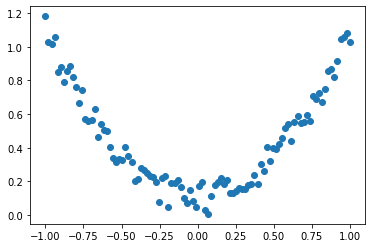

In [4]:
X = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = X.pow(2) + 0.2 * torch.rand(X.size())

plt.scatter(X.numpy(), y.numpy())
plt.show()

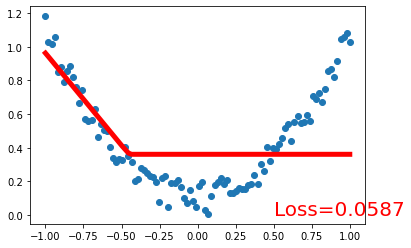

In [8]:
from IPython import display
class Net(torch.nn.Module):
    def __init__(self, in_features, hidden_features, out_features):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(in_features, hidden_features)
        self.predict = torch.nn.Linear(hidden_features, out_features)
        print(self)
    
    # X是网络的输入信息
    def forward(self, X):
        X = torch.relu(self.hidden(X))
        X = self.predict(X)
        return X

net = Net(1, 10, 1)

plt.ion() # interactive mode on，实时打印模式
plt.show()

# 优化器
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)
# 损失函数
loss_func = torch.nn.MSELoss()

# 开始训练
for t in range(100): # 100步
    prediction = net(X)
    loss = loss_func(prediction, y)
    optimizer.zero_grad() # 梯度清零，因为Pytorch默认会对梯度进行累加，还能提高性能，减少内存消耗(内部优化)
    loss.backward()
    optimizer.step()

    if t % 5 == 0:
        plt.cla() # clear all 
        plt.scatter(X.numpy(), y.numpy())
        plt.plot(X.numpy(), prediction.detach().numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data, fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)
        display.clear_output(wait=True)
        plt.pause(0.00000001)

plt.ioff()
plt.show()

torch.save(net, 'net.pkl') # entire net
# 更快
torch.save(net.state_dict(), 'net_parameters.pkl')  # parameters

In [24]:
def restore_net():
    # 加载完整网络
    net = torch.load('net.pkl')

def restore_parameters():
    # 用参数加载网络
    net = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )
    # 要求网络结构一模一样
    net.load_state_dict(torch.load('./net_parameters.pkl'))

restore_parameters()

RuntimeError: Error(s) in loading state_dict for Sequential:
	Missing key(s) in state_dict: "0.weight", "0.bias", "2.weight", "2.bias". 
	Unexpected key(s) in state_dict: "hidden.weight", "hidden.bias", "predict.weight", "predict.bias". 